In [1]:
run_name = 'current'

In [2]:
import os
import glob
from functools import reduce

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Client side analysis

In [4]:
# read in the data
data_dict = dict()

for d in glob.glob("./results/" + run_name + "/httperf_*"):
    data_list = []
    for i in glob.glob(d + "/httperf_client_*.csv"):
        data_list.append(pd.read_csv(i, header=0, na_filter=False))

    data_frame = pd.DataFrame()
    for i in ['Rate', 'Request rate', 'Number of requests',
              'Response status 1xx', 'Response status 2xx', 'Response status 3xx', 
              'Response status 4xx', 'Response status 5xx']:
        data_frame[i] = reduce(lambda x, y: x + y, [data_list[j][i] for j in range(len(data_list))])
        
    data_frame['Response time'] = reduce(lambda x, y: x + y, [data_list[j]['Response time'] 
                                                              for j in range(len(data_list))]) / len(data_list)
    data_dict[os.path.basename(d)] = data_frame

### 1. Request rate analysis

In [5]:
plot_request_unbalance = pd.DataFrame()
plot_request_balance = pd.DataFrame()

plot_request_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_request_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_request_unbalance['Request rate - ' + d] = data_dict[d]['Request rate']
    if '_balance_' in d:
        plot_request_balance['Request rate - ' + d] = data_dict[d]['Request rate']

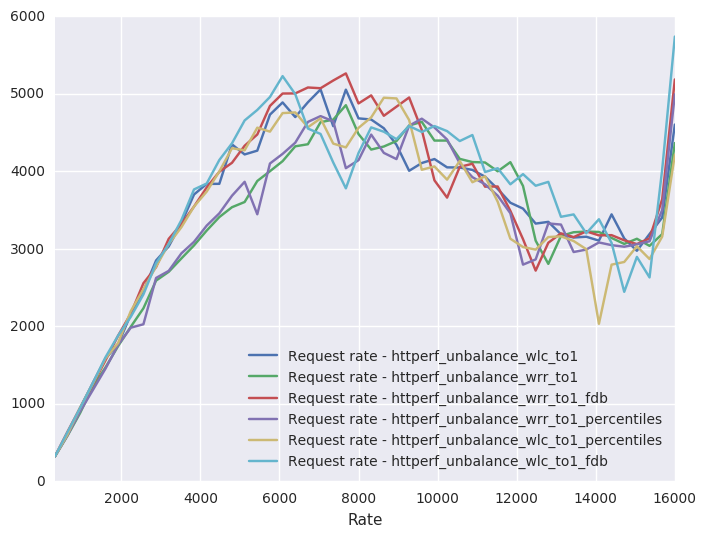

In [6]:
plot_request_unbalance.plot('Rate')

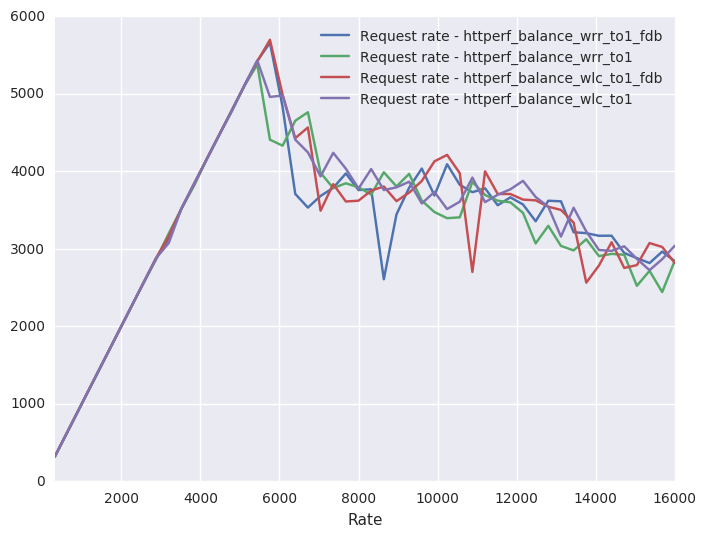

In [7]:
plot_request_balance.plot('Rate')

In [8]:
plot_request_unbalance.describe()

,Rate,Request rate - httperf_unbalance_wlc_to1,Request rate - httperf_unbalance_wrr_to1,Request rate - httperf_unbalance_wrr_to1_fdb,Request rate - httperf_unbalance_wrr_to1_percentiles,Request rate - httperf_unbalance_wlc_to1_percentiles,Request rate - httperf_unbalance_wlc_to1_fdb
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,3518.214000,3375.414000,3577.782000,3327.974000,3409.186000,3613.050000
std,4664.761516,1144.849693,1118.606565,1239.070605,1118.271141,1157.602364,1212.235215
min,320.000000,320.000000,320.000000,319.800000,320.000000,320.000000,320.000000
25%,4240.000000,3136.825000,3040.025000,3113.825000,2945.900000,2898.825000,3066.150000
50%,8160.000000,3737.100000,3473.500000,3650.450000,3451.800000,3576.700000,3913.950000
75%,12080.000000,4323.500000,4310.450000,4670.675000,4154.475000,4305.875000,4501.500000
max,16000.000000,5056.800000,4853.400000,5263.600000,4993.900000,4949.700000,5738.800000


In [9]:
plot_request_balance.describe()

,Rate,Request rate - httperf_balance_wrr_to1_fdb,Request rate - httperf_balance_wrr_to1,Request rate - httperf_balance_wlc_to1_fdb,Request rate - httperf_balance_wlc_to1
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,3342.318000,3295.716000,3377.050000,3394.754000
std,4664.761516,1088.639806,1075.445836,1130.738578,1089.993505
min,320.000000,320.000000,320.000000,320.000000,320.000000
25%,4240.000000,2896.725000,2873.400000,2796.625000,2976.675000
50%,8160.000000,3567.150000,3469.500000,3613.150000,3605.200000
75%,12080.000000,3787.825000,3859.075000,3951.775000,3931.375000
max,16000.000000,5658.300000,5378.500000,5698.000000,5430.900000


### 2. Response time analysis

In [10]:
plot_response_unbalance = pd.DataFrame()
plot_response_balance = pd.DataFrame()

plot_response_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_response_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_response_unbalance['Response time - ' + d] = data_dict[d]['Response time']
    if '_balance_' in d:
        plot_response_balance['Response time - ' + d] = data_dict[d]['Response time']

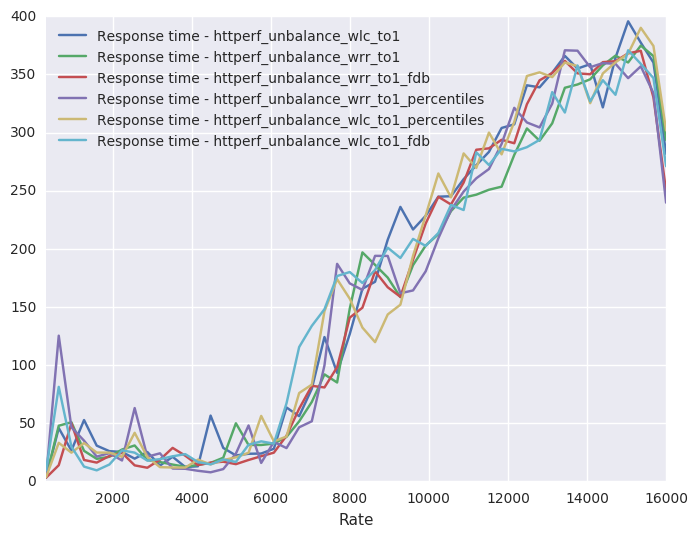

In [11]:
plot_response_unbalance.plot('Rate')

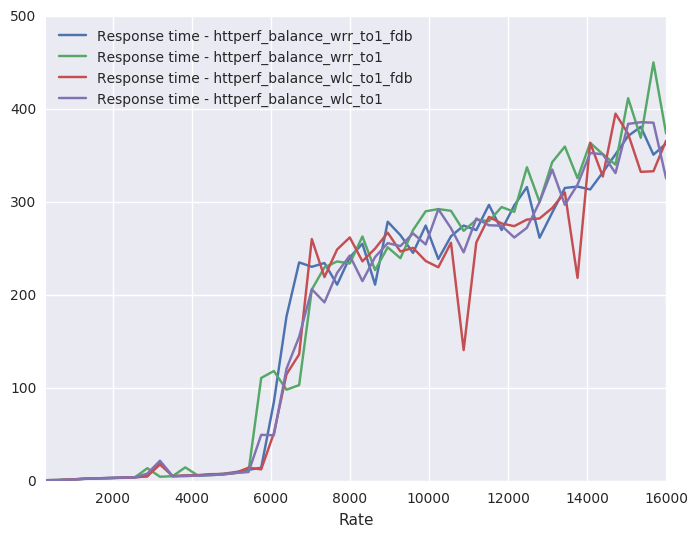

In [12]:
plot_response_balance.plot('Rate')

In [13]:
plot_response_unbalance.describe()

,Rate,Response time - httperf_unbalance_wlc_to1,Response time - httperf_unbalance_wrr_to1,Response time - httperf_unbalance_wrr_to1_fdb,Response time - httperf_unbalance_wrr_to1_percentiles,Response time - httperf_unbalance_wlc_to1_percentiles,Response time - httperf_unbalance_wlc_to1_fdb
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,167.927375,156.866000,159.221625,161.209500,165.680750,163.717000
std,4664.761516,137.856134,130.801810,137.692285,132.222610,138.870660,127.771199
min,320.000000,3.212500,3.600000,3.112500,3.662500,3.606250,9.393750
25%,4240.000000,26.898438,30.953125,21.656250,25.328125,24.712500,25.173437
50%,8160.000000,146.212500,153.528125,145.093750,164.421875,144.959375,178.331250
75%,12080.000000,298.832813,273.975000,289.720312,284.837500,301.378125,283.610937
max,16000.000000,395.718750,374.831250,370.350000,370.781250,390.125000,370.818750


In [14]:
plot_response_balance.describe()

,Rate,Response time - httperf_balance_wrr_to1_fdb,Response time - httperf_balance_wrr_to1,Response time - httperf_balance_wlc_to1_fdb,Response time - httperf_balance_wlc_to1
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,178.858875,186.213250,170.052125,175.613750
std,4664.761516,139.148703,147.732167,137.520184,139.907279
min,320.000000,1.206250,1.200000,1.175000,1.225000
25%,4240.000000,7.440625,7.804688,7.754687,7.651563
50%,8160.000000,237.231250,235.337500,233.371875,232.681250
75%,12080.000000,286.506250,294.385938,276.571875,280.821875
max,16000.000000,381.200000,450.450000,395.381250,386.168750


### 3. Success rate analysis

In [15]:
plot_success_unbalance = pd.DataFrame()
plot_success_balance = pd.DataFrame()

plot_success_unbalance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
plot_success_balance['Rate'] = data_dict[list(data_dict.keys())[0]]['Rate']
    
for d in data_dict:
    if '_unbalance_' in d:
        plot_success_unbalance['Success rate - ' + d] = (data_dict[d]['Response status 2xx'] + 
                                                         data_dict[d]['Response status 3xx']) / data_dict[d]['Number of requests'] * 100.0
    if '_balance_' in d:
        plot_success_balance['Success rate - ' + d] = (data_dict[d]['Response status 2xx'] + 
                                                       data_dict[d]['Response status 3xx']) / data_dict[d]['Number of requests'] * 100.0

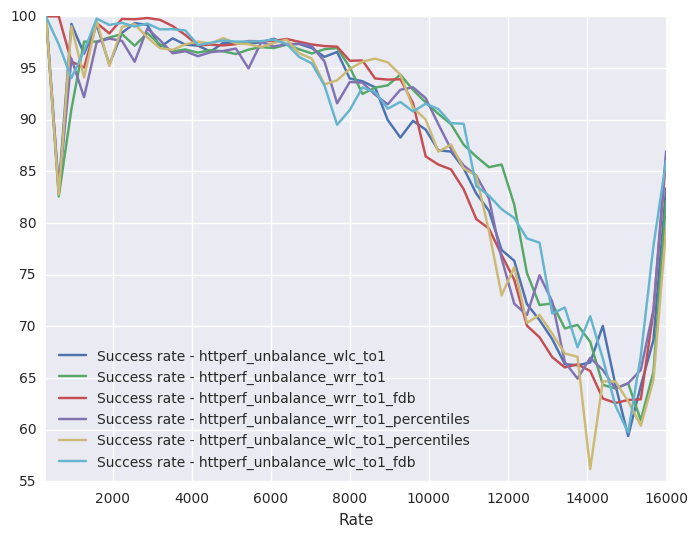

In [16]:
plot_success_unbalance.plot('Rate')

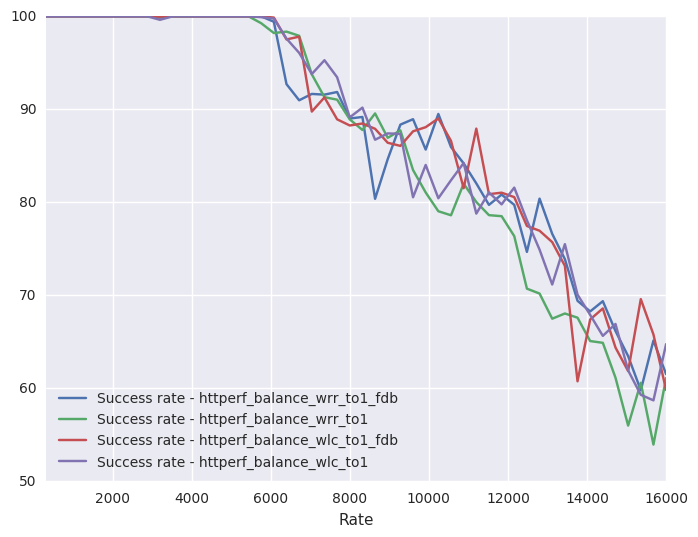

In [17]:
plot_success_balance.plot('Rate')

In [18]:
plot_success_unbalance.describe()

,Rate,Success rate - httperf_unbalance_wlc_to1,Success rate - httperf_unbalance_wrr_to1,Success rate - httperf_unbalance_wrr_to1_fdb,Success rate - httperf_unbalance_wrr_to1_percentiles,Success rate - httperf_unbalance_wlc_to1_percentiles,Success rate - httperf_unbalance_wlc_to1_fdb
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,87.274208,88.029359,87.661245,87.333578,86.897536,88.676641
std,4664.761516,12.427657,11.818414,13.212992,11.849441,13.274716,11.349947
min,320.000000,59.380653,60.912362,62.583115,63.977661,56.188663,59.728011
25%,4240.000000,78.343270,82.258964,77.546331,78.020511,76.600224,81.665944
50%,8160.000000,93.424462,93.210461,95.334814,92.660070,94.224913,92.197078
75%,12080.000000,97.308792,96.818341,97.603481,96.644761,97.300940,97.561505
max,16000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.937498


In [19]:
plot_success_balance.describe()

,Rate,Success rate - httperf_balance_wrr_to1_fdb,Success rate - httperf_balance_wrr_to1,Success rate - httperf_balance_wlc_to1_fdb,Success rate - httperf_balance_wlc_to1
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,8160.000000,87.498166,85.905768,87.740770,87.280239
std,4664.761516,12.653779,14.750354,12.896921,13.303998
min,320.000000,59.794872,53.953551,59.829666,58.705842
25%,4240.000000,79.891117,76.900874,80.639781,79.036157
50%,8160.000000,89.342376,89.238626,88.702463,89.660168
75%,12080.000000,100.000000,100.000000,100.000000,100.000000
max,16000.000000,100.000000,100.000000,100.000000,100.000000


## Server side analysis

In [21]:
# read in the data
stats_dict = dict()

for d in glob.glob("./results/" + run_name + "/httperf_*"):
    stats_frame = pd.read_csv(d + "/httperf_server_stats.csv", header=0, na_filter=False)
    for i in ['Connections', 'Packets', 'Bytes (K)']:
        stats_frame[i + ' Ratio (%)'] = stats_frame[i] / sum(stats_frame[i]) * 100
    
    stats_dict[os.path.basename(d)] = stats_frame

### 1. Connections ratio (%)

In [22]:
plot_connections_unbalance = pd.DataFrame()
plot_connections_balance = pd.DataFrame()

plot_connections_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_connections_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_connections_unbalance['Connections Ratio (%) - ' + d] = stats_dict[d]['Connections Ratio (%)']
    if '_balance_' in d:
        plot_connections_balance['Connections Ratio (%) - ' + d] = stats_dict[d]['Connections Ratio (%)']

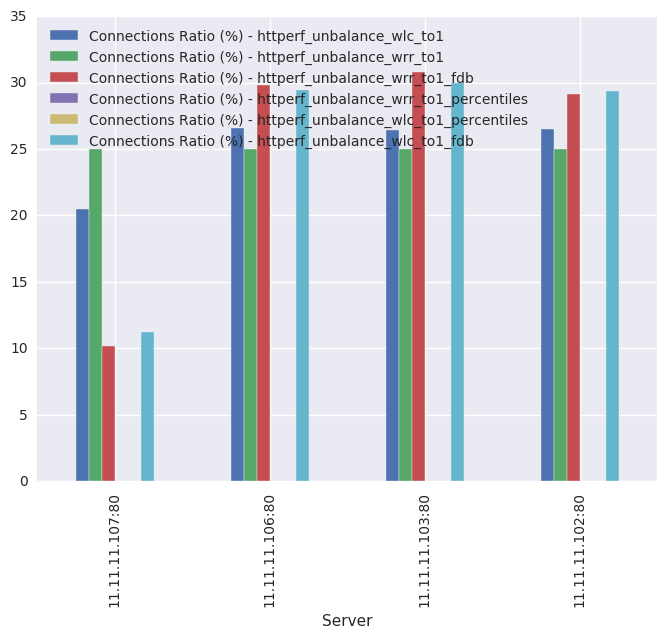

In [23]:
plot_connections_unbalance.plot('Server', kind='bar')

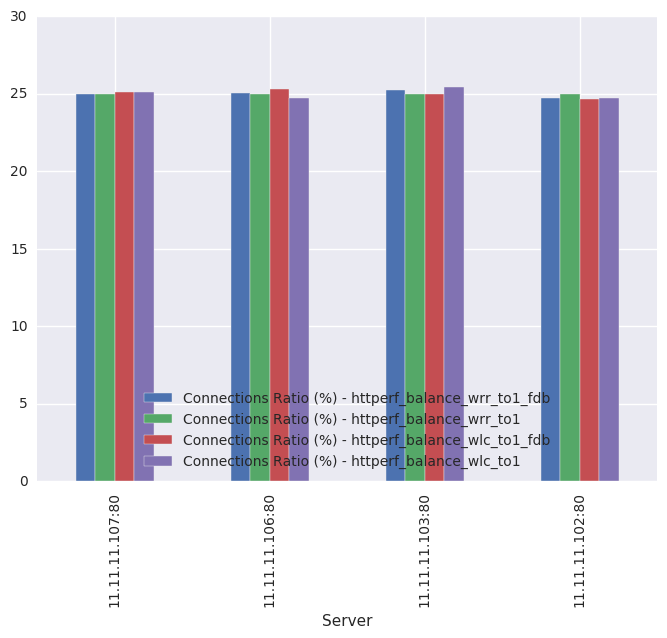

In [24]:
plot_connections_balance.plot('Server', kind='bar')

### 2. Packets ratio (%)

In [25]:
plot_packets_unbalance = pd.DataFrame()
plot_packets_balance = pd.DataFrame()

plot_packets_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_packets_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_packets_unbalance['Packets Ratio (%) - ' + d] = stats_dict[d]['Packets Ratio (%)']
    if '_balance_' in d:
        plot_packets_balance['Packets Ratio (%) - ' + d] = stats_dict[d]['Packets Ratio (%)']

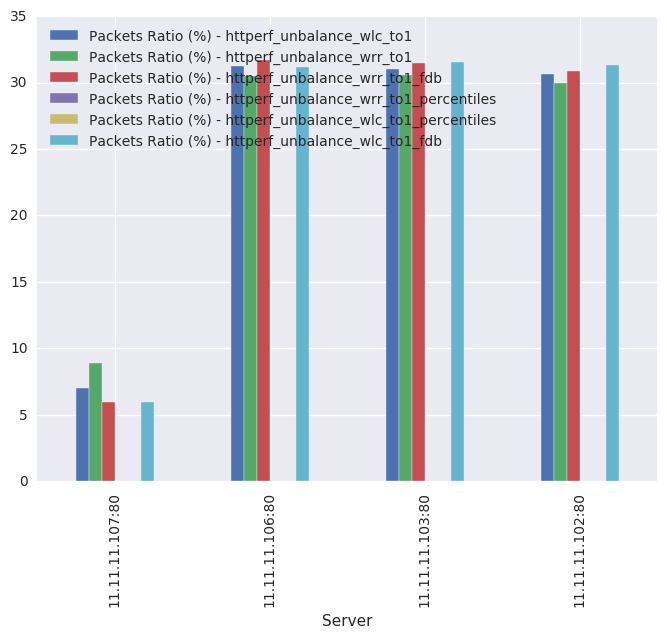

In [26]:
plot_packets_unbalance.plot('Server', kind='bar')

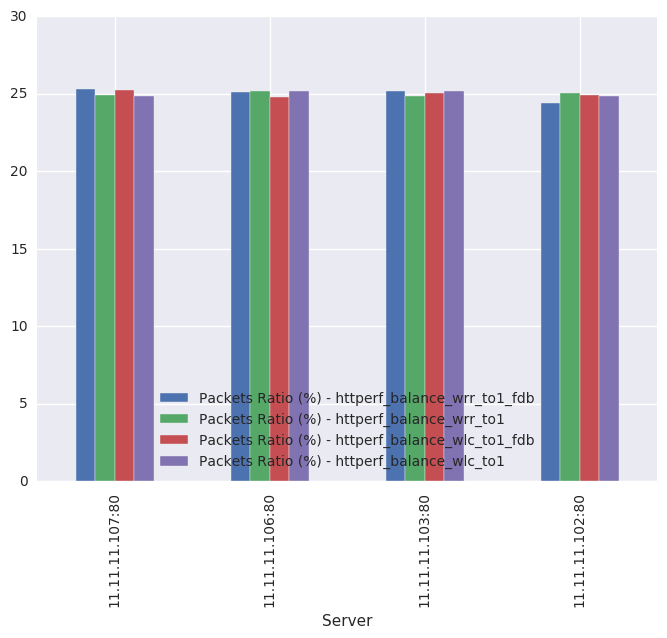

In [27]:
plot_packets_balance.plot('Server', kind='bar')

### 3. Bytes ratio (%)

In [28]:
plot_bytes_unbalance = pd.DataFrame()
plot_bytes_balance = pd.DataFrame()

plot_bytes_unbalance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
plot_bytes_balance['Server'] = stats_dict[list(stats_dict.keys())[0]]['Server']
    
for d in stats_dict:
    if '_unbalance_' in d:
        plot_bytes_unbalance['Bytes (K) Ratio (%) - ' + d] = stats_dict[d]['Bytes (K) Ratio (%)']
    if '_balance_' in d:
        plot_bytes_balance['Bytes (K) Ratio (%) - ' + d] = stats_dict[d]['Bytes (K) Ratio (%)']

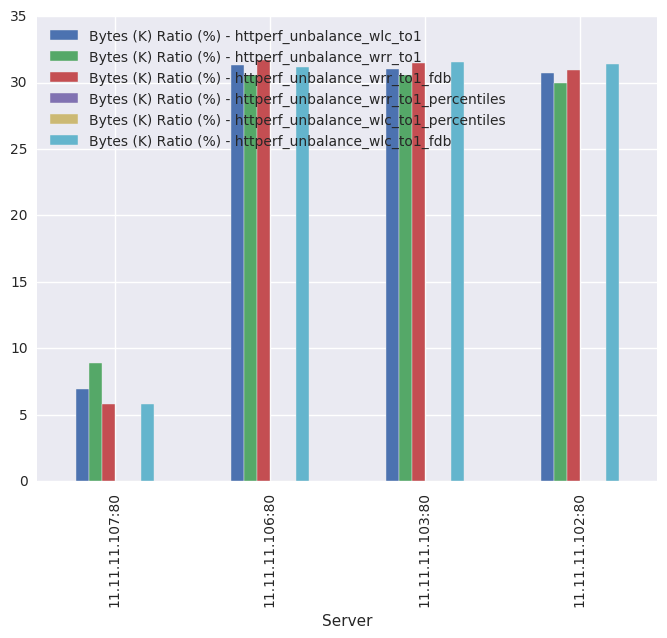

In [29]:
plot_bytes_unbalance.plot('Server', kind='bar')

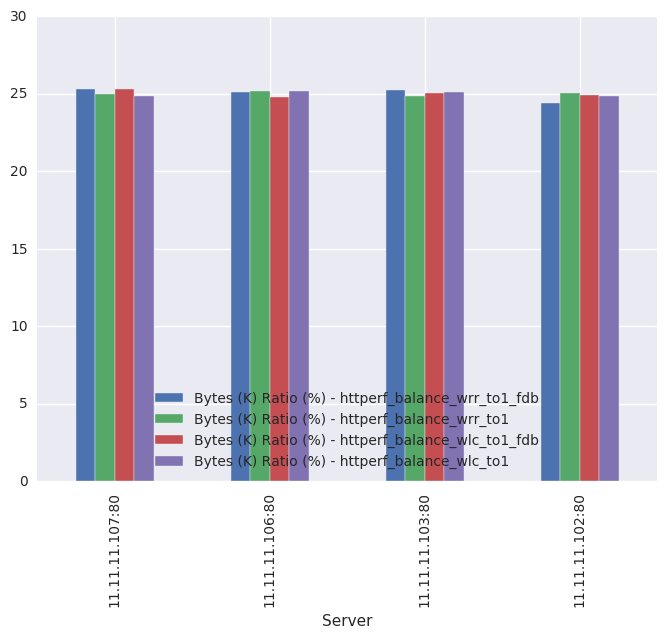

In [30]:
plot_bytes_balance.plot('Server', kind='bar')